### Correlation Analysis on Finacial News
Perform CA on News Data


''' Aligns news timestamps to trading days using timezone-aware logic (UTC-4 → US/Eastern).

    Performs sentiment analysis using TextBlob.

    Calculates stock daily returns.

    Aggregates daily sentiment per stock.

    Performs correlation analysis (Pearson) between sentiment and returns.

    Visualizes correlations using a heatmap.'''

In [ ]:
# Enables automatic reloading of modules when they change
%load_ext autoreload
%autoreload 2

'### Aligns news timestamps to trading days using timezone-aware logic (UTC-4 → US/Eastern).\n\n### Performs sentiment analysis using TextBlob.\n\n### Calculates stock daily returns.\n\n### Aggregates daily sentiment per stock.\n\n### Performs correlation analysis (Pearson) between sentiment and returns.\n\n### Visualizes correlations using a heatmap.'

In [14]:
import sys
import os
sys.path.append(os.path.abspath(".."))
import pandas as pd

In [ ]:
apple = pd.read_csv('../data/AAPL_historical_data.csv')
amzn = pd.read_csv('../data/AMZN_historical_data.csv')
goog = pd.read_csv('../data/GOOG_historical_data.csv')
meta = pd.read_csv('../data/META_historical_data.csv')  
msft = pd.read_csv('../data/MSFT_historical_data.csv')
nvda = pd.read_csv('../data/NVDA_historical_data.csv')
tesla = pd.read_csv('../data/TSLA_historical_data.csv')

In [31]:
df_news = pd.read_csv('../data/raw_analyst_ratings.csv')

In [39]:
df_news.head(100)

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A
...,...,...,...,...,...,...
95,95,Barclays Maintains Equal-Weight on Agilent Tec...,https://www.benzinga.com/news/19/10/14566662/b...,Vick Meyer,2019-10-09 00:00:00,A
96,96,Shares of several healthcare companies are tra...,https://www.benzinga.com/markets/wiim/19/10/14...,Benzinga Newsdesk,2019-10-08 00:00:00,A
97,97,Shares of several healthcare companies are tra...,https://www.benzinga.com/markets/wiim/19/10/14...,Benzinga Newsdesk,2019-10-02 00:00:00,A
98,98,Shares of several healthcare companies are tra...,https://www.benzinga.com/markets/wiim/19/09/14...,Benzinga Newsdesk,2019-09-05 00:00:00,A


In [40]:
from scripts.correlation_analysis import (
    align_news_to_trading_day, apply_sentiment_analysis, aggregate_daily_sentiment,
    prepare_all_stocks, correlation_matrix, plot_correlation_heatmap
)

      Correlation  N
AAPL    -1.000000  2
AMZN    -1.000000  2
TSLA    -1.000000  2
NVDA     0.284230  6
GOOG    -0.146348  4
META          NaN  0
MSFT          NaN  0


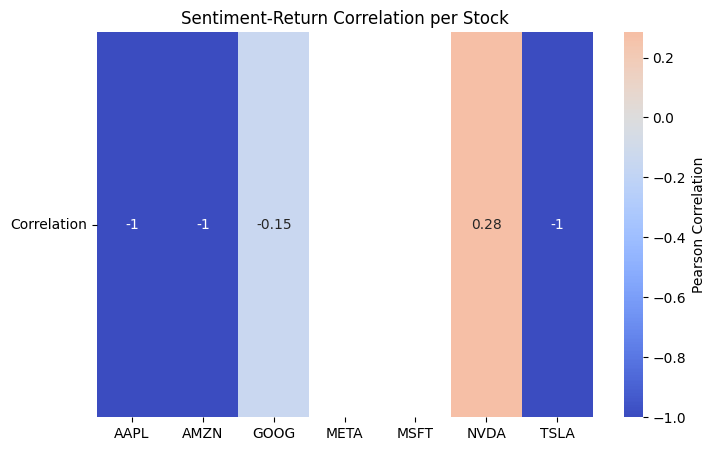

In [42]:
# Load news data
news_df = pd.read_csv('../data/raw_analyst_ratings.csv')

# Align to trading days 
news_df = align_news_to_trading_day(news_df)

# Apply sentiment scoring
news_df = apply_sentiment_analysis(news_df)

# Aggregate daily sentiment per stock
sentiment_df = aggregate_daily_sentiment(news_df)

# Load and prepare stock return data
stock_data = prepare_all_stocks('../data')

# Correlate sentiment and returns
corr_df, pval_df, count_df = correlation_matrix(stock_data, sentiment_df)

# Show correlations sorted by strength
summary_df = corr_df.join(count_df).sort_values(by='Correlation', key=abs, ascending=False)
print(summary_df)


# Heatmap visualization
plot_correlation_heatmap(corr_df)